# Task-A: Binary Classification

In [1]:
import pandas as pd
import numpy as np

## Data Munging

### Reading Data

In [2]:
trainData = pd.DataFrame(pd.read_csv("train_wbcd.csv"))
testData  = pd.DataFrame(pd.read_csv("test_wbcd.csv"))
trainClass = trainData['Diagnosis']
testClass = testData['Diagnosis']
print(len(list(trainData))-2)
print(len(list(testData))-2)

30
30


In [3]:
DataClassB = trainData[trainData['Diagnosis']=='B']
DataClassM = trainData[trainData['Diagnosis']=='M']

print("LengthOfClassB",len(DataClassB))
print("LengthOfClassM",len(DataClassM))

LengthOfClassB 58
LengthOfClassM 42


In [4]:
trainData = trainData.drop(['Diagnosis','Patient_ID'],axis=1).copy()
testData = testData.drop(['Diagnosis','Patient_ID'],axis=1).copy()

As we can see the ratio of both classes of data is 42/58 is 0.7 so data is fairly balanced. If this ratio would have been below 0.5 then we would have classified this data as unbalanced

### Features with missing entries

In [5]:
null_data = trainData[trainData.isnull().any(axis=1)]

In [6]:
(null_data.T)

,70,74
f1,13.620000,12.450000
f2,23.230000,15.700000
f3,87.190000,82.570000
f4,573.200000,477.100000
f5,0.092460,0.127800
f6,0.067470,0.170000
f7,0.029740,0.157800
f8,0.024430,0.080890
f9,0.166400,0.208700
f10,0.058010,0.076130


As we can see f21 has got NaN values so it is a feature with missing values

### Filling the missing feature values with mean of the respective feature vector

In [7]:
trainData = trainData.fillna(trainData.mean())
testData = testData.fillna(testData.mean())

### Normalizing the Training and Testing Data(Z-Score Normalization)

In [8]:
for i in range(0,len(trainData.T)):
    trainData.T.iloc[i] = ((trainData.T.iloc[i] - np.mean(trainData.T.iloc[i]))/np.std(trainData.T.iloc[i]))
    
for i in range(0,len(testData.T)):
    testData.T.iloc[i] = ((testData.T.iloc[i] - np.mean(testData.T.iloc[i]))/np.std(testData.T.iloc[i]))

print('Train and Test Data Normalized!!')

Train and Test Data Normalized!!


In [9]:
trainX = trainData
testX = testData
trainY = trainClass
testY = testClass

trainY = trainY.replace(['B','M'],[0,1])
testY = testY.replace(['B','M'],[0,1])


### Data PreProcessing

In [10]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn import metrics


### Choosing the best hyperparameter

In [53]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn import linear_model
alphaList = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
crossValMeanScores = []
for i in range(0,len(alphaList)):
    lasso = linear_model.Lasso(alpha=alphaList[i])    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(lasso, trainX, trainY, cv=10)
    crossValMeanScores.append(np.mean(scores))
minScore = min(crossValMeanScores)
print("All of the alphas except 0.1 are giving equal Mean Squared error so all of them are good to use except 0.1")

All of the alphas except 0.1 are giving equal Mean Squared error so all of them are good to use except 0.1


### Training on Best Hyper Parameter

In [54]:
import sklearn 
from sklearn.linear_model import Lasso

regressor = Lasso(random_state=0,alpha=alphaList[2])
regressor.fit(trainX,trainY)
predLasso = regressor.predict(testX)

score = np.sqrt(metrics.mean_squared_error(predLasso,testY))

print("Mean Squared Error: ",score)

Mean Squared Error:  1.833673257176854


### L1 Regression with Best Hyperparameter determined using Cross Validation Approach

### Accuracy Score

In [56]:
predLasso = np.around(predLasso)
avgValidation = (sklearn.metrics.accuracy_score(testY,predLasso))*100
print("Accuracy: ",avgValidation," %")

Accuracy:  20.37037037037037  %


### Precision Score | F1 Scores

In [14]:
precision = (sklearn.metrics.precision_recall_fscore_support(testY,predLasso))
print("===================")
print("Precision | F1 Scores: ")
print("===================")
print(precision)

Precision | F1 Scores: 
(array([0.7, 0. ]), array([1., 0.]), array([0.82352941, 0.        ]), array([14,  6], dtype=int64))


C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix

In [15]:
confusionMatrix = sklearn.metrics.confusion_matrix(testY,predLasso)

print("================")
print("Confusion Matrix")
print("================")
print(confusionMatrix)

Confusion Matrix
[[14  0]
 [ 6  0]]


## Implementing Logistic Regression with L2(Ridge) Regularization

### Choosing the best HyperParameter

In [16]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn import linear_model
lambdaList = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
crossValMeanScores = []
for i in range(0,len(lambdaList)):
    lasso = linear_model.Ridge(alpha=lambdaList[i])    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(lasso, trainX, trainY, cv=10)
    crossValMeanScores.append(np.mean(scores))
minScore = min(crossValMeanScores)
indexMinScore = crossValMeanScores.index(minScore)
bestLambda = lambdaList[indexMinScore]
print("The Best Lambda is: ",bestLambda)


The Best Lambda is:  0.001


### Testing on Best Hyperparameter

In [17]:
import sklearn
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=bestLambda)

regressor.fit(trainX,trainY)
predRidge = regressor.predict(testX)

score = np.sqrt(metrics.mean_squared_error(predRidge,testY))

print("Final Root Mean Square Error: ",(score))

Final Root Mean Square Error:  0.368380059468925


In [18]:
predRidge = np.around(predRidge)
print("Accuracy: ",(sklearn.metrics.accuracy_score(testY,predRidge))*100," %")

Accuracy:  80.0  %


### Precision Score

In [19]:
precision = (sklearn.metrics.precision_recall_fscore_support(testY,predRidge))
print("===================")
print("Precision | F1 Scores: ")
print("===================")
print(precision)

Precision | F1 Scores: 
(array([0.        , 0.92307692, 0.8       , 0.        ]), array([0.        , 0.85714286, 0.66666667, 0.        ]), array([0.        , 0.88888889, 0.72727273, 0.        ]), array([ 0, 14,  6,  0], dtype=int64))


C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Confusion Matrix

In [20]:
confusionMatrix = sklearn.metrics.confusion_matrix(testY,predRidge)

print("================")
print("Confusion Matrix")
print("================")
print(confusionMatrix)

Confusion Matrix
[[ 0  0  0  0]
 [ 1 12  1  0]
 [ 0  1  4  1]
 [ 0  0  0  0]]


# Task-B: Multiclass Classification

### Reading Data

In [21]:
MNISTData = pd.DataFrame(pd.read_csv("reduced_mnist.csv"))

In [22]:
print("No. Of Data Points: ",len(MNISTData))
print("No Of Features: ",len(MNISTData.T))
print("Unique labels in Data: ",set(MNISTData['label']))

No. Of Data Points:  2520
No Of Features:  785
Unique labels in Data:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Splitting the Data

In [23]:
trainY = MNISTData['label']
trainX = MNISTData.drop('label',axis = 1).copy()


In [24]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(trainX,trainY,test_size = 0.3,random_state = 0)

### Training using OneVsRest Classifier

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [26]:
predictionsMNIST = OneVsRestClassifier(LinearSVC(random_state=0)).fit(trainX, trainY).predict(testX)

In [27]:
score = np.sqrt(metrics.mean_squared_error(predictionsMNIST,testY))

In [28]:
print("Root Mean Squared Error: ",score)

Root Mean Squared Error:  1.9585655046433437


### Accuracy Score

In [29]:
print("Accuracy: ",(sklearn.metrics.accuracy_score(testY,predictionsMNIST))*100," %")

Accuracy:  80.95238095238095  %


### Precision Score

In [30]:
precision = (sklearn.metrics.precision_recall_fscore_support(testY,predictionsMNIST))
print("===================")
print("Precision | F1 Scores: ")
print("===================")
print(precision)

Precision | F1 Scores: 
(array([0.91566265, 0.92857143, 0.78125   , 0.83116883, 0.78571429,
       0.73239437, 0.93150685, 0.94545455, 0.55223881, 0.66666667]), array([0.9047619 , 0.96808511, 0.67567568, 0.82051282, 0.76744186,
       0.69333333, 0.91891892, 0.78787879, 0.67272727, 0.8       ]), array([0.91017964, 0.94791667, 0.72463768, 0.82580645, 0.77647059,
       0.71232877, 0.92517007, 0.85950413, 0.60655738, 0.72727273]), array([84, 94, 74, 78, 86, 75, 74, 66, 55, 70], dtype=int64))


### Confusion Matrix

In [31]:
confusionMatrix = sklearn.metrics.confusion_matrix(testY,predictionsMNIST)

print("================")
print("Confusion Matrix")
print("================")
print(confusionMatrix)

Confusion Matrix
[[76  0  1  0  1  2  1  0  0  3]
 [ 0 91  0  0  0  0  0  0  3  0]
 [ 1  1 50  4  1  4  0  0 12  1]
 [ 0  0  2 64  0  6  1  1  0  4]
 [ 0  0  0  0 66  1  2  1  6 10]
 [ 3  2  0  7  2 52  1  0  4  4]
 [ 1  0  2  0  1  0 68  0  1  1]
 [ 1  0  4  1  3  0  0 52  1  4]
 [ 1  4  4  0  2  6  0  0 37  1]
 [ 0  0  1  1  8  0  0  1  3 56]]


### 2.1 Choosing the best Hyperparameter

In [32]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn import linear_model
alphaList = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
crossValMeanScores = []
for i in range(0,len(alphaList)):
    lasso = linear_model.Lasso(alpha=alphaList[i])    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(lasso, trainX, trainY, cv=10)
    crossValMeanScores.append(np.mean(scores))
minScore = min(crossValMeanScores)

In [33]:
indexMinScore = crossValMeanScores.index(minScore)
bestAlpha = lambdaList[indexMinScore]
print("The Best Alpha is: ",bestAlpha)

The Best Alpha is:  1


In [34]:
import sklearn 
from sklearn.linear_model import Lasso

regressor = Lasso(random_state=0,alpha=bestAlpha)
regressor.fit(trainX,trainY)
predLasso = regressor.predict(testX)

score = np.sqrt(metrics.mean_squared_error(predLasso,testY))

print("Mean Squared Error: ",score)

Mean Squared Error:  1.789227646764992


### Plotting 

In [35]:
import matplotlib.pyplot as plt

regressor = Lasso(random_state=0,alpha=alphaList[0])
regressor.fit(trainX,trainY)
predLasso = regressor.predict(testX)
score = np.sqrt(metrics.mean_squared_error(predLasso,testY))

11
11


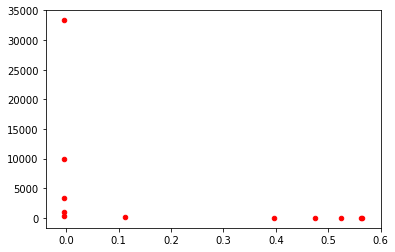

In [59]:
print(len(crossValMeanScores))
print(len(alphaList))
plt.scatter(crossValMeanScores,alphaList, color = 'red')
